In [7]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\Work\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [10]:
my_nc_file = '/Users/Work/Desktop/Regine_project/data/2t_201902_Mar_format.nc'
data = Dataset(my_nc_file, mode='r')

In [11]:
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
tass = data.variables['tas'][:]
data.close()
ens_mean = np.mean(tass, axis=(0,1))
print(ens_mean.shape)

(31, 51)


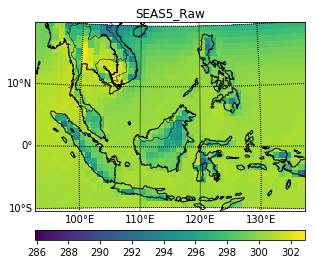

In [13]:
# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(ens_mean))

# Add Grid Lines
m.drawparallels(np.arange(-10., 30., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(90., 150., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")

# Add Title
plt.title('SEAS5_Raw')

plt.show()